In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

sys.path.append('../../../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd
import math

# import script that has formation channel classification functions:
from PostProcessingScripts import * 
from formation_channels import *  # downloads the functions to calculate formation channels 


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}

adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'] # channels to plot 



In [2]:

def obtain_axes_layout_dict():

    
    dict_2D_initial_axeslayout  = \
    {
        'qZAMS_separationInitial_logx':{'xlabel':r'\textbf{initial mass ratio} $q_{\rm{i}} $' , 'ylabel':r'\textbf{initial semi-major axis} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$', 'logX':False, 'logY':True, 'xlim':[0,1], 'ylim':[1E-1, 10**2], 'PDFxlim':[2*1E0, 0.9*1E4], 'PDFylim':[2*1E-1, 0.9*1E3]},\
        'M1ZAMS_M2ZAMS':{'xlabel':r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$', 'logX':False, 'logY':False, 'xlim':[5,150], 'ylim':[5,150], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E2]},\
        'M1ZAMS_M2ZAMS_logxlogy':{'xlabel':r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$', 'logX':True, 'logY':True, 'xlim':[5,150], 'ylim':[5,150], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E2]},\
        'M1_M2':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{f}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{final mass} $m_{2,{\rm{f}}} \, [\rm{M}_{\odot}]$', 'logX':False, 'logY':False, 'xlim':[1,70], 'ylim':[1,70], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E2]},\
        'M1_M2_logxlogy':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{f}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{final mass} $m_{2,{\rm{f}}} \, [\rm{M}_{\odot}]$', 'logX':True, 'logY':True, 'xlim':[1,70], 'ylim':[1,70], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E4]},\
        'M1LVK_tdelay_logy':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{LVK}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'$t_{\rm{delay}} \ [\rm{Myr}]$', 'logX':False, 'logY':True, 'xlim':[1,70], 'ylim':[1E-2,1E5], 'PDFxlim':[2*1E0, 0.9*1E4], 'PDFylim':[2*1E0, 0.9*1E3]},\
        'M1LVK_tdelay_logxlogy':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{LVK}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'$t_{\rm{delay}} \ [\rm{Myr}]$', 'logX':True, 'logY':True, 'xlim':[1,70], 'ylim':[1E-2,1E5], 'PDFxlim':[2*1E-2, 0.4*1E2], 'PDFylim':[2*1E0, 0.9*1E3]},\
        'qLVK_tdelay_logy':{'xlabel':r'\textbf{mass ratio} $q_{\rm{LVK}}$' , 'ylabel':r'$t_{\rm{delay}} \ [\rm{Myr}]$', 'logX':False, 'logY':True, 'xlim':[0,1], 'ylim':[1E-2,1E5], 'PDFxlim':[2*1E0, 0.9*1E1], 'PDFylim':[2*1E0, 0.9*1E4]},\
        'M1LVK_M2LVK':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{LVK}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{final mass} $m_{2,{\rm{LVK}}} \, [\rm{M}_{\odot}]$', 'logX':True, 'logY':True, 'xlim':[1,70], 'ylim':[1,70], 'PDFxlim':[2*1E-2, 0.4*1E2], 'PDFylim':[2*1E0, 0.9*1E4]}        
    }
    
    return dict_2D_initial_axeslayout 



def make_up_axes_2D(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=16, labelSizeMajor=16):
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxes(axe, nameX=dl['xlabel'], nameY=dl['ylabel'], setMinor=False, labelpad=0, fontsize=fontsize, labelSizeMajor=labelSizeMajor)  
    
    
    if dl['logX']==True: axe.set_xscale('log')
    if dl['logY']==True: axe.set_yscale('log')    

        
    axe.set_xlim(dl['xlim'])
    axe.set_ylim(dl['ylim'])
    axe.grid(True)
    
    axe.tick_params(direction="in", which='both')

    return axe



def make_up_axes2DNoYlabel(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=26, labelSizeMajor=26):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxesNoYlabel(axe, nameX=dl['xlabel'], nameY=dl['ylabel'], setMinor=False, labelpad=0, fontsize=fontsize, labelSizeMajor=labelSizeMajor)  

    
    if dl['logX']==True: axe.set_xscale('log')
    if dl['logY']==True: axe.set_yscale('log')    

        
    axe.set_xlim(dl['xlim'])
    axe.set_ylim(dl['ylim'])
    axe.grid(True)
    
    axe.tick_params(direction="in", which='both')

    return axe

def make_up_axesNoXlabel(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=26, labelSizeMajor=26):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxesNoXlabel(axe, nameX=dl['xlabel'], nameY=dl['ylabel'], setMinor=False, labelpad=0, fontsize=fontsize, labelSizeMajor=labelSizeMajor)  

    
    if dl['logX']==True: axe.set_xscale('log')
    if dl['logY']==True: axe.set_yscale('log')    

        
    axe.set_xlim(dl['xlim'])
    axe.set_ylim(dl['ylim'])
    axe.grid(True)

    axe.tick_params(direction="in", which='both')
    
    return axe


def make_up_axes_histNoXlabel(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=18, labelSizeMajor=18):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxesNoXlabel(axe, nameX=dl['xlabel'], nameY=r'$\textbf{PDF} \ [10^6 M_{\odot}^{-1}]$', setMinor=False, labelpad=0,  fontsize=fontsize, labelSizeMajor=labelSizeMajor)  
    axe.tick_params(direction="in")
    
    if dl['logX']==True: axe.set_xscale('log')
    axe.set_yscale('log')   # always set y-scale = log   

        
    axe.set_xlim(dl['xlim'])
    axe.set_ylim(dl['PDFylim'])
    axe.grid(True)
    axe.tick_params(labelbottom=False, direction="in", which='both') 

    return axe




def make_up_axes_histNoYlabel(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=18, labelSizeMajor=18):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxesNoYlabel(axe, nameY=dl['xlabel'], nameX=r'$\textbf{PDF} \ [10^6 M_{\odot}^{-1}]$', setMinor=False, labelpad=0,  fontsize=fontsize, labelSizeMajor=labelSizeMajor)  
    
    if dl['logY']==True: axe.set_yscale('log')
    axe.set_xscale('log')   # always set y-scale = log   

        
    axe.set_ylim(dl['ylim'])
    axe.set_xlim(dl['PDFxlim'])
    axe.grid(True)

    axe.tick_params(direction="in", which='both')
    axe.tick_params(labelleft=False) 
    
    return axe



def make_up_axes_fractionNoXlabel(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=18, labelSizeMajor=18):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxesNoXlabel(axe, nameX=dl['xlabel'], nameY=r'$\textbf{fraction}$', setMinor=False, labelpad=0,  fontsize=fontsize, labelSizeMajor=labelSizeMajor)  
    axe.tick_params(direction="in")
    
    if dl['logX']==True: axe.set_xscale('log')

    axe.set_xlim(dl['xlim'])
    axe.set_ylim([0,1])
    axe.grid(True)
    axe.tick_params(labelbottom=False, direction="in", which='both') 

    return axe




def make_up_axes_fractionNoYlabel(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=18, labelSizeMajor=18):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxesNoYlabel(axe, nameY=dl['xlabel'], nameX=r'$\textbf{fraction}$', setMinor=False, labelpad=0,  fontsize=fontsize, labelSizeMajor=labelSizeMajor)  
    
    if dl['logY']==True: axe.set_yscale('log')

    axe.set_ylim(dl['ylim'])
    axe.set_xlim([0,1])
    axe.grid(True)

    axe.tick_params(direction="in", which='both')
    axe.tick_params(labelleft=False) 
    
    return axe





def obtain_parameter_from_data(fdata_key, param_key=None, param_function=None):
    
    # assign the x-param and y-param 
    if (param_key!=None):
        param =  fdata_key[param_key][...].squeeze()
        
    elif (param_key==None) & (param_function!=None):
        if param_function=='qZAMS': param =  fdata_key['M2ZAMS'][...].squeeze() / fdata_key['M1ZAMS'][...].squeeze() 
        elif param_function=='qDCO': param =  fdata_key['M2'][...].squeeze() / fdata_key['M1'][...].squeeze() 
        elif param_function=='M1LVK': param, _ = obtainM1BHandM2BHassymetric(m1=fdata_key['M1'][...].squeeze(), m2=fdata_key['M2'][...].squeeze()) 
        elif param_function=='M2LVK': _, param = obtainM1BHandM2BHassymetric(m1=fdata_key['M1'][...].squeeze(), m2=fdata_key['M2'][...].squeeze()) 
        elif param_function=='tdelay': param = fdata_key['tform'][...].squeeze() + fdata_key['tc'][...].squeeze() # in Myr 
        
        elif param_function in ['qLVK', 'MchirpmassLVK']: 
            M1LVK, M2LVK = obtainM1BHandM2BHassymetric(m1=fdata_key['M1'][...].squeeze(), m2=fdata_key['M2'][...].squeeze()) 
            if param_function=='qLVK':param =  M2LVK/M1LVK
            if param_function=='MchirpmassLVK':param =  M2LVK/M1LVK
                
    elif (param_key==None) & (param_function==None):
        print('Error: no param key or function provided')
    
    return param

    


def plot_2D_simulation_formation_properties_single_model(axe, pathData = '/Volumes/SimonsFoundation/DataDCO/', DCOtype = 'BHNS', xparam_key=None, yparam_key='separationInitial', xparam_function='qZAMS', yparam_function=None, BPSmodelName='A',\
                                                        adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi']):
    """ 
    plots for a single BPS model the 2D formation channel properties for given xparam and yparam 
    
    """
    
    path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
    fdata = h5.File(path, 'r') # read in data 
    fdco = fdata['doubleCompactObjects']
    
    channels = fdco['formaton channel'][...].squeeze()

    xparam = obtain_parameter_from_data(fdco, xparam_key, xparam_function)
    yparam = obtain_parameter_from_data(fdco, yparam_key, yparam_function)


    for nrC, Channel in enumerate(adjustedChannelList): 
#             print('now at formation channel: ', Channel)
            ind_wanted = dictFormationChannelIndex[Channel]
            c_FC = channelColorDict[Channel] # color of the channel 
            mask_fc = (channels==ind_wanted) # get a mask for all the DCO systems that fulfill this criteria 

            axe.scatter(xparam[mask_fc], yparam[mask_fc], c=channelColorDict[Channel], s=1, label=dictChannelsBHNSListBolt[Channel])       

    fdata.close()

                
    return axe





def plot_1D_simulation_formation_properties_single_model(axe, pathData = '/Volumes/SimonsFoundation/DataDCO/', DCOtype = 'BHNS', param_key=None,  param_function='qZAMS', BPSmodelName='A',\
                                                        adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'], rotated_axes=False, plot_param_name='qZAMS_separationInitial_logx'):
    meanMassEvolved = 77708655
    totalMassEvolved = meanMassEvolved #= 77708655
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    
    path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
    fdata = h5.File(path, 'r') # read in data 
    fdco = fdata['doubleCompactObjects']
    
    channels = fdco['formaton channel'][...].squeeze()

    param = obtain_parameter_from_data(fdco, param_key, param_function)
    weights = obtain_parameter_from_data(fdco, 'weight', None)

    for nrC, Channel in enumerate(adjustedChannelList): 
        ind_wanted = dictFormationChannelIndex[Channel]
        c_FC = channelColorDict[Channel] # color of the channel 
        mask_fc = (channels==ind_wanted) # get a mask for all the DCO systems that fulfill this criteria 
 
        if (dl['logX']==False) & (rotated_axes==False):  bins = np.linspace(dl['xlim'][0], dl['xlim'][1], 50) 
        elif (dl['logX']==True) & (rotated_axes==False): bins = np.logspace(np.log10(dl['xlim'][0]), np.log10(dl['xlim'][1]), 50) 
        elif (dl['logY']==True) & (rotated_axes==True):  bins = np.logspace(np.log10(dl['ylim'][0]), np.log10(dl['ylim'][1]), 50)
        elif (dl['logY']==False) & (rotated_axes==True): bins = np.linspace(dl['ylim'][0], dl['ylim'][1], 50)           
            
        hist, bin_edges = np.histogram(param[mask_fc], bins=bins, weights=weights[mask_fc], density=True)
        bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
        data_y = hist * ((np.sum(weights[mask_fc])*1E6)/totalMassEvolved) # multiply by *1E6 to make axes nicer 
        if rotated_axes==False:
            axe.plot(bin_centers, data_y, color=c_FC, lw=2, zorder=9, marker='o', markersize=4) #, ls=linestyles_mssfrind[ind_mssfr_zind])
        else: 
            axe.plot(data_y, bin_centers, color=c_FC, lw=2, zorder=9, marker='o', markersize=4) # plot it on 90 degrees flipped axes     
    
    rate_fc = np.sum(weights[mask_fc])/totalMassEvolved # in [Msun^-1]
    
    
    return rate_fc










def plot_fraction_simulation_formation_properties_single_model(axe, pathData = '/Volumes/SimonsFoundation/DataDCO/', DCOtype = 'BHNS', param_key=None,  param_function='qZAMS', BPSmodelName='A',\
                                                        adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'], rotated_axes=False, plot_param_name='qZAMS_separationInitial_logx'):
    meanMassEvolved = 77708655
    totalMassEvolved = meanMassEvolved #= 77708655
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    
    path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
    fdata = h5.File(path, 'r') # read in data 
    fdco = fdata['doubleCompactObjects']
    
    channels = fdco['formaton channel'][...].squeeze()

    param = obtain_parameter_from_data(fdco, param_key, param_function)
    weights = obtain_parameter_from_data(fdco, 'weight', None)
    
    
 
    if (dl['logX']==False) & (rotated_axes==False):  bins = np.linspace(dl['xlim'][0], dl['xlim'][1], 50) 
    elif (dl['logX']==True) & (rotated_axes==False): bins = np.logspace(np.log10(dl['xlim'][0]), np.log10(dl['xlim'][1]), 50) 
    elif (dl['logY']==True) & (rotated_axes==True):  bins = np.logspace(np.log10(dl['ylim'][0]), np.log10(dl['ylim'][1]), 50)
    elif (dl['logY']==False) & (rotated_axes==True): bins = np.linspace(dl['ylim'][0], dl['ylim'][1], 50)           

    tot_hist, bin_edges = np.histogram(param, bins=bins, weights=weights, density=True)
    bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
    tot_data_y = tot_hist * ((np.sum(weights)*1E6)/totalMassEvolved) # multiply by *1E6 to make axes nicer 
    
    threshold = 1E-3
    mask_low_rates =   tot_data_y < threshold 
    
    for nrC, Channel in enumerate(adjustedChannelList): 
        ind_wanted = dictFormationChannelIndex[Channel]
        c_FC = channelColorDict[Channel] # color of the channel 
        mask_fc = (channels==ind_wanted) # get a mask for all the DCO systems that fulfill this criteria 

        hist, _ = np.histogram(param[mask_fc], bins=bins, weights=weights[mask_fc], density=True)
#         bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
        data_y = hist * ((np.sum(weights[mask_fc])*1E6)/totalMassEvolved) # multiply by *1E6 to make axes nicer 
        
        
        fraction = data_y/tot_data_y
        fraction[mask_low_rates] = np.zeros_like(fraction)[mask_low_rates]
        if rotated_axes==False:
            axe.plot(bin_centers, fraction, color=c_FC, lw=2, zorder=9, marker='o', markersize=4) #, ls=linestyles_mssfrind[ind_mssfr_zind])
        else: 
            axe.plot(fraction, bin_centers, color=c_FC, lw=2, zorder=9, marker='o', markersize=4) # plot it on 90 degrees flipped axes     
    
    fraction_fc = np.sum(weights[mask_fc])/np.sum(weights) # in [Msun^-1]
    
    
    
    return fraction_fc





def plot_1D_simulation_formation_properties_single_model_total(axe, pathData = '/Volumes/SimonsFoundation/DataDCO/', DCOtype = 'BHNS', param_key=None,  param_function='qZAMS', BPSmodelName='A',\
                                                        adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'], rotated_axes=False, plot_param_name='qZAMS_separationInitial_logx'):
    meanMassEvolved = 77708655
    totalMassEvolved = meanMassEvolved #= 77708655
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
    fdata = h5.File(path, 'r') # read in data 
    
    fdco = fdata['doubleCompactObjects']

    param = obtain_parameter_from_data(fdco, param_key, param_function)
    weights = obtain_parameter_from_data(fdco, 'weight', None)
    
    c_all, ls_all = 'k', '--'

    if (dl['logX']==False) & (rotated_axes==False):  bins = np.linspace(dl['xlim'][0], dl['xlim'][1], 50) 
    elif (dl['logX']==True) & (rotated_axes==False): bins = np.logspace(np.log10(dl['xlim'][0]), np.log10(dl['xlim'][1]), 50) 
    elif (dl['logY']==True) & (rotated_axes==True):  bins = np.logspace(np.log10(dl['ylim'][0]), np.log10(dl['ylim'][1]), 50)
    elif (dl['logY']==False) & (rotated_axes==True): bins = np.linspace(dl['ylim'][0], dl['ylim'][1], 50)           

    hist, bin_edges = np.histogram(param, bins=bins, weights=weights, density=True)
    bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
    data_y = hist * ((np.sum(weights)*1E6)/totalMassEvolved) # multiply by *1E6 to make axes nicer 
    if rotated_axes==False:
        axe.plot(bin_centers, data_y, color=c_all, lw=2, zorder=9, markersize=4, ls=ls_all) #, ls=linestyles_mssfrind[ind_mssfr_zind])
    else: 
        axe.plot(data_y, bin_centers, color=c_all, lw=2, zorder=9, markersize=4, ls=ls_all) # plot it on 90 degrees flipped axes     
    
    rate_all = np.sum(weights)/totalMassEvolved # in [Msun^-1]
    
    return rate_all


In [3]:
def plot_constant_q_grid(axe, plot_param_name = 'qZAMS_separationInitial_logx'):
    
    dl = obtain_axes_layout_dict()[plot_param_name]

    ## Add constant mass ratio lines 
    xmin, xmax = dl['xlim']
    ymin, ymax = dl['ylim']
    
    x_q = np.linspace(xmin, xmax) # Msun, M1 range
    # plot a few fixed mass ratios:
    qlist = [5., 3.333333334, 2., 1.]
    qtextvalue=[0.2, 0.3,  0.5, 1]
    for ind_q, qvalue in enumerate(qlist):
        y_q =  x_q / qvalue


        y_text = 45 # Msun 
        if y_text*qvalue < 150:
            x_text = y_text * qvalue 
        else: 
            x_text = 141.
            y_text = x_text / qvalue

        # I am calculating the angle theta for the text: (see notes on this)
        delta_y = ((y_text - ymin) / (ymax-ymin)) 
        delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
        ratio = delta_y / delta_x
        theta_angle = math.degrees(math.atan((ratio)))

        axe.plot(x_q, y_q, c='k', lw=2, linestyle =':')
        axe.text(x_text, y_text, s=r'$q_{\rm{i}} =$ %s '%qtextvalue[ind_q], fontsize=14, \
                       horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   


    return



In [4]:


def plot_param_fc_together(pathData='/Volumes/SimonsFoundation/DataDCO/',     plot_param_name = 'qZAMS_separationInitial_logx', xparam_key = None, xparam_function = 'qZAMS', yparam_key = 'separationInitial', yparam_function =  None, path_to_folder_figures='path_to_figures'):
    path_to_folder_figures = './figures/' + plot_param_name +  '/'    

    for ind_bps, BPSmodelName in enumerate(BPSnameslist[0:]):
        fig, axes = plt.subplots(1,3, figsize=(26,10)) # figure size 

        for ind_dco, DCOtype in enumerate(['BBH', 'BHNS', 'BNS']):
            axe = axes[ind_dco]

            axe=plot_2D_simulation_formation_properties_single_model(axe, pathData, DCOtype, xparam_key, yparam_key, xparam_function, yparam_function, BPSmodelName)
            make_up_axes(axe, plot_param_name)


        plt.tight_layout()
#         plt.savefig(path_to_folder_figures + 'initial2D_' + BPSmodelName  + '_'+ 'AllDCOs' + '.png', dpi=300, transparent=False)

        plt.show()  

        
 
        

In [10]:
def plot_param_fc_for_all_BPS_per_channel_with_fraction(pathData='/Volumes/SimonsFoundation/DataDCO/',     plot_param_name = 'qZAMS_separationInitial_logx', xparam_key = None, xparam_function = 'qZAMS', yparam_key = 'separationInitial', yparam_function =  None, adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii']):
    path_to_folder_figures = './figures/' + plot_param_name +  '/'    
    
    

    for nrC, Channel in enumerate(adjustedChannelList[:]): # and over formation channels 

        fc_label=dictChannelsBHNSListBolt[Channel]
        fc_c=channelColorDict[Channel]
        fig, axes = plt.subplots(2,6, figsize=(32,10), width_ratios=[3, 1, 3, 1, 3, 1], height_ratios=[1,3]) # figure size 
        
        for ind_bps, BPSmodelName in enumerate(BPSnameslist[:]): # loop over population synthesis models

            for ind_dco, DCOtype in enumerate(['BBH', 'BHNS', 'BNS']):
#             for ind_dco, DCOtype in enumerate(['BHNS']):
                
                ####### 1D hist axes on top panel #######
                axe = axes[0, ind_dco*2]
                fraction_fc = plot_fraction_simulation_formation_properties_single_model(axe, pathData, DCOtype, xparam_key, xparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=False, plot_param_name= plot_param_name)
                make_up_axes_fractionNoXlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=14)
#                 rate_total = plot_1D_simulation_formation_properties_single_model_total(axe, pathData, DCOtype, xparam_key, xparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=False, plot_param_name= plot_param_name)

                
                ####### make 2nd PDF on right panel #######
                axe = axes[1, 1+ind_dco*2]
                _ = plot_fraction_simulation_formation_properties_single_model(axe, pathData, DCOtype, yparam_key, yparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=True, plot_param_name= plot_param_name)
                make_up_axes_fractionNoYlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=14)
#                 _ = plot_1D_simulation_formation_properties_single_model_total(axe, pathData, DCOtype, yparam_key, yparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=True, plot_param_name= plot_param_name) # plot total

        
                axe = axes[0, 1+ind_dco*2]
                axe.axis("off")
                
            
                #### 2D hist bottom axes #######
                axe = axes[1, ind_dco*2]
                
                axe=plot_2D_simulation_formation_properties_single_model(axe, pathData, DCOtype, xparam_key, yparam_key, xparam_function, yparam_function, BPSmodelName, adjustedChannelList=[Channel]) # plots the 2D distributions 
                if ind_dco==0:make_up_axes_2D(axe, plot_param_name, fontsize=16, labelSizeMajor=16) # only add big labels for the first most left plot 
                else: 
                    make_up_axes2DNoYlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=16)
                    axe.tick_params(labelleft=False)
                
#                 ## add annotations on the axes 
#                 axe.annotate(r'$\textbf{model %s:}$ %s'%(BPSmodelName, alphabetPhysicalNameDict[BPSmodelName]), xy=(0.01, 0.99), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='left', va="top", color='k')
#                 axe.annotate(fc_label, xy=(0.01, 0.96), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='left', va="top", color=fc_c)
                
#                 fc_percentage = int(np.round(100*rate_fc/rate_total))
#                 axe.annotate(r'$\eta = %s \ [10^6 M_{\odot}^{-1}]$'%"{:.2e}".format(rate_total*1E6),  xy=(0.01, 0.05), xycoords='axes fraction', fontsize = fs-10, weight = 'bold', ha='left', va="bottom", color='k')
#                 an_label = r'$\eta = {:.2e} \ $'.format(rate_fc*1E6) + r'$[10^6 M_{\odot}^{-1}]$' + r'$ \ ({}\%)$'.format(fc_percentage)
#                 axe.annotate(an_label, xy=(0.01, 0.01), xycoords='axes fraction', fontsize = fs-10, weight = 'bold', ha='left', va="bottom", color=fc_c)
                
                
        axe.annotate(fc_label, xy=(0.01, 0.96), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='left', va="top", color=fc_c)


        plt.tight_layout()
        plt.subplots_adjust(wspace=0, hspace=0)

#         plt.savefig(path_to_folder_figures + 'initial2D_' + 'allBPS' + '_'+ str(nrC) + '.png', dpi=300, transparent=False)

        plt.show()  
    





In [12]:
def plot_param_fc_all_with_PDF(pathData='/Volumes/SimonsFoundation/DataDCO/',     plot_param_name = 'qZAMS_separationInitial_logx', xparam_key = None, xparam_function = 'qZAMS', yparam_key = 'separationInitial', yparam_function =  None,  adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii']):
    path_to_folder_figures = './figures/' + plot_param_name +  '/'    
    
    for ind_bps, BPSmodelName in enumerate(BPSnameslist[:]): # loop over population synthesis models

        fig, axes = plt.subplots(2,6, figsize=(32,10), width_ratios=[3, 1, 3, 1, 3, 1], height_ratios=[1,3]) # figure size 
        
        for nrC, Channel in enumerate(adjustedChannelList[:]): # and over formation channels 

            fc_label=dictChannelsBHNSListBolt[Channel]
            fc_c=channelColorDict[Channel]

            for ind_dco, DCOtype in enumerate(['BBH', 'BHNS', 'BNS']):
                
                ####### 1D hist axes on top panel #######
                axe = axes[0, ind_dco*2]
                rate_fc = plot_1D_simulation_formation_properties_single_model(axe, pathData, DCOtype, xparam_key, xparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=False, plot_param_name= plot_param_name)
                make_up_axes_histNoXlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=14)
                rate_total = plot_1D_simulation_formation_properties_single_model_total(axe, pathData, DCOtype, xparam_key, xparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=False, plot_param_name= plot_param_name)

                ####### make 2nd PDF on right panel #######
                axe = axes[1, 1+ind_dco*2]
                _ = plot_1D_simulation_formation_properties_single_model(axe, pathData, DCOtype, yparam_key, yparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=True, plot_param_name= plot_param_name)
                make_up_axes_histNoYlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=14)
                _ = plot_1D_simulation_formation_properties_single_model_total(axe, pathData, DCOtype, yparam_key, yparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=True, plot_param_name= plot_param_name) # plot total

                axe = axes[0, 1+ind_dco*2]
                axe.axis("off")
                
                #### 2D hist bottom axes #######
                axe = axes[1, ind_dco*2]
                
                axe=plot_2D_simulation_formation_properties_single_model(axe, pathData, DCOtype, xparam_key, yparam_key, xparam_function, yparam_function, BPSmodelName, adjustedChannelList=[Channel]) # plots the 2D distributions 
                if ind_dco==0:make_up_axes_2D(axe, plot_param_name, fontsize=16, labelSizeMajor=16) # only add big labels for the first most left plot 
                else: 
                    make_up_axes2DNoYlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=16)
                    axe.tick_params(labelleft=False)
      
                fc_percentage = int(np.round(100*rate_fc/rate_total))
                an_label = r'$ \ ({}\%)$'.format(fc_percentage)
                y_loc = 0.96 - 0.025*nrC
                axe.annotate(an_label, xy=(0.01, y_loc), xycoords='axes fraction', fontsize = fs-10, weight = 'bold', ha='left', va="top", color=fc_c)
                
                
        axe.annotate(r'$\textbf{model %s:}$ %s'%(BPSmodelName, alphabetPhysicalNameDict[BPSmodelName]), xy=(0.01, 0.99), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='left', va="top", color='k')        
                
        plt.tight_layout()
        plt.subplots_adjust(wspace=0, hspace=0)

#         plt.savefig(path_to_folder_figures + 'initial2D_' + BPSmodelName  + '_all' + '.png', dpi=300, transparent=False)

        
        plt.show()  
    



In [68]:
def plot_1D_simulation_formation_properties_single_model_redshift_weights(axe, pathData = '/Volumes/SimonsFoundation/DataDCO/', DCOtype = 'BHNS', param_key=None,  param_function='qZAMS', BPSmodelName='A',\
                                                        adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'], rotated_axes=False, plot_param_name='qZAMS_separationInitial_logx', which_z_ind=0):
    meanMassEvolved = 77708655
    totalMassEvolved = meanMassEvolved #= 77708655
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    
    path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
    fdata = h5.File(path, 'r') # read in data 
    fdco = fdata['doubleCompactObjects']
    
    channels = fdco['formaton channel'][...].squeeze()

    param = obtain_parameter_from_data(fdco, param_key, param_function)

    
    redshifts = obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/')
    whichz = str(np.round(redshifts[which_z_ind], 4))   
    
    header_string = 'w_321_z_' +whichz 
    weights = fdata['weights_intrinsicPerRedshift'][header_string] # in Gpc yr^-1 
    
#     weights = obtain_parameter_from_data(fdco, 'weight', None)

    for nrC, Channel in enumerate(adjustedChannelList): 
        ind_wanted = dictFormationChannelIndex[Channel]
        c_FC = channelColorDict[Channel] # color of the channel 
        mask_fc = (channels==ind_wanted) # get a mask for all the DCO systems that fulfill this criteria 
 
        if (dl['logX']==False) & (rotated_axes==False):  bins = np.linspace(dl['xlim'][0], dl['xlim'][1], 50) 
        elif (dl['logX']==True) & (rotated_axes==False): bins = np.logspace(np.log10(dl['xlim'][0]), np.log10(dl['xlim'][1]), 50) 
        elif (dl['logY']==True) & (rotated_axes==True):  bins = np.logspace(np.log10(dl['ylim'][0]), np.log10(dl['ylim'][1]), 50)
        elif (dl['logY']==False) & (rotated_axes==True): bins = np.linspace(dl['ylim'][0], dl['ylim'][1], 50)           
            
        hist, bin_edges = np.histogram(param[mask_fc], bins=bins, weights=weights[mask_fc], density=True)
        bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
        data_y = hist * np.sum(weights[mask_fc]) # multiply by *1E6 to make axes nicer 
#         if rotated_axes==False:
        axe.plot(bin_centers, data_y, color=c_FC, lw=2, zorder=9, marker='o', markersize=4) #, ls=linestyles_mssfrind[ind_mssfr_zind])
#         else: 
#             axe.plot(data_y, bin_centers, color=c_FC, lw=2, zorder=9, marker='o', markersize=4) # plot it on 90 degrees flipped axes     
    
    rate_fc = np.sum(weights[mask_fc])#/totalMassEvolved # in [Msun^-1]
    
    
    return rate_fc


def plot_1D_simulation_formation_properties_single_model_total_redshift_weights(axe, pathData = '/Volumes/SimonsFoundation/DataDCO/', DCOtype = 'BHNS', param_key=None,  param_function='qZAMS', BPSmodelName='A',\
                                                        adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'], rotated_axes=False, plot_param_name='qZAMS_separationInitial_logx', which_z_ind=0):
    meanMassEvolved = 77708655
    totalMassEvolved = meanMassEvolved #= 77708655
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
    fdata = h5.File(path, 'r') # read in data 
    
    fdco = fdata['doubleCompactObjects']

    param = obtain_parameter_from_data(fdco, param_key, param_function)
    
    
    redshifts = obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/')
    print('running for z=', redshifts[which_z_ind])
    whichz = str(np.round(redshifts[which_z_ind], 4))   
    
    header_string = 'w_321_z_' +whichz 
    weights = fdata['weights_intrinsicPerRedshift'][header_string] # in Gpc yr^-1 
#     weights = obtain_parameter_from_data(fdco, 'weight', None)
    
    c_all, ls_all = 'k', '--'

    if (dl['logX']==False) & (rotated_axes==False):  bins = np.linspace(dl['xlim'][0], dl['xlim'][1], 50) 
    elif (dl['logX']==True) & (rotated_axes==False): bins = np.logspace(np.log10(dl['xlim'][0]), np.log10(dl['xlim'][1]), 50) 
    elif (dl['logY']==True) & (rotated_axes==True):  bins = np.logspace(np.log10(dl['ylim'][0]), np.log10(dl['ylim'][1]), 50)
    elif (dl['logY']==False) & (rotated_axes==True): bins = np.linspace(dl['ylim'][0], dl['ylim'][1], 50)           

    hist, bin_edges = np.histogram(param, bins=bins, weights=weights, density=True)
    bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
    data_y = hist * np.sum(weights) # multiply by *1E6 to make axes nicer 
#     if rotated_axes==False:
    axe.plot(bin_centers, data_y, color=c_all, lw=2, zorder=9, markersize=4, ls=ls_all) #, ls=linestyles_mssfrind[ind_mssfr_zind])
   
    rate_all = np.sum(weights) #/totalMassEvolved # in [Msun^-1]
    
    return rate_all


In [69]:
def obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/'):
    """
    function that returns the list of redshifts for which the simulations have been run
    
    """
    
    BPSmodelName='A'
    DCOtype='BNS'
    path_ = pathData + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    fdata = h5.File(path, 'r')
    redshifts = fdata['redshifts']['redshift'][...].squeeze()
    fdata.close()
    return redshifts 



def make_up_axes_hist_z_weights(axe, plot_param_name = 'qZAMS_separationInitial_logx', fontsize=18, labelSizeMajor=18):
    
    
    dl = obtain_axes_layout_dict()[plot_param_name]
    
    axe = layoutAxes(axe, nameX=dl['xlabel'], nameY=r'$\textbf{PDF} \ [10^6 M_{\odot}^{-1}]$', setMinor=False, labelpad=0,  fontsize=fontsize, labelSizeMajor=labelSizeMajor)  
    axe.tick_params(direction="in")
    
    if dl['logX']==True: axe.set_xscale('log')
    axe.set_yscale('log')   # always set y-scale = log   

        
    axe.set_xlim(dl['xlim'])
    axe.set_ylim(dl['PDFylim'])
    axe.grid(True)
    axe.tick_params(labelbottom=True, direction="in", which='both') 

    return axe


def plot_param_fc_all_justPDF(pathData='/Volumes/SimonsFoundation/DataDCO/',     plot_param_name = 'qZAMS_separationInitial_logx', xparam_key = None, xparam_function = 'qZAMS', yparam_key = 'separationInitial', yparam_function =  None,  adjustedChannelList= ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii'], which_z_ind=0):
    path_to_folder_figures = './figures/' + plot_param_name +  '/'    
    
    redshifts = obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/')
    print('running for z=', redshifts[which_z_ind])
    whichz = str(np.round(redshifts[which_z_ind], 4))  
    
    
    for ind_bps, BPSmodelName in enumerate(BPSnameslist[:2]): # loop over population synthesis models

        fig, axes = plt.subplots(1,3, figsize=(20,6)) # figure size # width_ratios=[3, 1, 3, 1, 3, 1], height_ratios=[1,3]
        
        for nrC, Channel in enumerate(adjustedChannelList[:]): # and over formation channels 

            fc_label=dictChannelsBHNSListBolt[Channel]
            fc_c=channelColorDict[Channel]

            for ind_dco, DCOtype in enumerate(['BBH', 'BHNS', 'BNS']):
                
                ####### 1D hist axes on top panel #######
                axe = axes[ind_dco]
                rate_fc = plot_1D_simulation_formation_properties_single_model_redshift_weights(axe, pathData, DCOtype, xparam_key, xparam_function, BPSmodelName, \
                                                                               adjustedChannelList=[Channel], rotated_axes=False, plot_param_name= plot_param_name, which_z_ind=which_z_ind)
                make_up_axes_hist_z_weights(axe, plot_param_name, fontsize=16, labelSizeMajor=14)
                rate_total = plot_1D_simulation_formation_properties_single_model_total_redshift_weights(axe, pathData, DCOtype, xparam_key, xparam_function, BPSmodelName,\
                                                                               adjustedChannelList=[Channel], rotated_axes=False, plot_param_name= plot_param_name, which_z_ind=which_z_ind)

#                 ####### make 2nd PDF on right panel #######
#                 axe = axes[1, 1+ind_dco*2]
#                 _ = plot_1D_simulation_formation_properties_single_model(axe, pathData, DCOtype, yparam_key, yparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=True, plot_param_name= plot_param_name)
#                 make_up_axes_histNoYlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=14)
#                 _ = plot_1D_simulation_formation_properties_single_model_total(axe, pathData, DCOtype, yparam_key, yparam_function, BPSmodelName, adjustedChannelList=[Channel], rotated_axes=True, plot_param_name= plot_param_name) # plot total

#                 axe = axes[0, 1+ind_dco*2]
#                 axe.axis("off")
                
#                 #### 2D hist bottom axes #######
#                 axe = axes[1, ind_dco*2]
                
#                 axe=plot_2D_simulation_formation_properties_single_model(axe, pathData, DCOtype, xparam_key, yparam_key, xparam_function, yparam_function, BPSmodelName, adjustedChannelList=[Channel]) # plots the 2D distributions 

# #                 if ind_dco==0:make_up_axes_2D(axe, plot_param_name, fontsize=16, labelSizeMajor=16) # only add big labels for the first most left plot 
#                 else: 
#                     make_up_axes2DNoYlabel(axe, plot_param_name, fontsize=16, labelSizeMajor=16)
#                     axe.tick_params(labelleft=False)
      
                fc_percentage = int(np.round(100*rate_fc/rate_total))
                an_label = r'$ \ ({}\%)$'.format(fc_percentage)
                y_loc = 0.94 #- 0.025*nrC
                x_loc = 0.01 + 0.1*nrC
                axe.annotate(an_label, xy=(x_loc, y_loc), xycoords='axes fraction', fontsize = fs-10, weight = 'bold', ha='left', va="top", color=fc_c)
                
                
                axe.annotate(r'$\textbf{model %s:}$ %s'%(BPSmodelName, alphabetPhysicalNameDict[BPSmodelName]), xy=(0.01, 0.99), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='left', va="top", color='k') 
        
        axe.annotate(r'$z=%s$'%(whichz), xy=(0.98, 0.99), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='right', va="top", color='k')
                
        plt.tight_layout()
        plt.subplots_adjust(wspace=0, hspace=0)

#         plt.savefig(path_to_folder_figures + 'initial2D_' + BPSmodelName  + '_all' + '.png', dpi=300, transparent=False)

        
        plt.show()  
    



In [70]:
def obtain_axes_layout_dict():

    
    dict_2D_initial_axeslayout  = \
    {
        'qZAMS_separationInitial_logx':{'xlabel':r'\textbf{initial mass ratio} $q_{\rm{i}} $' , 'ylabel':r'\textbf{initial semi-major axis} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$', 'logX':False, 'logY':True, 'xlim':[0,1], 'ylim':[1E-1, 10**2], 'PDFxlim':[2*1E0, 0.9*1E4], 'PDFylim':[2*1E-1, 0.9*1E3]},\
        'M1ZAMS_M2ZAMS':{'xlabel':r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$', 'logX':False, 'logY':False, 'xlim':[5,150], 'ylim':[5,150], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E2]},\
        'M1ZAMS_M2ZAMS_logxlogy':{'xlabel':r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$', 'logX':True, 'logY':True, 'xlim':[5,150], 'ylim':[5,150], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E2]},\
        'M1_M2':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{f}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{final mass} $m_{2,{\rm{f}}} \, [\rm{M}_{\odot}]$', 'logX':False, 'logY':False, 'xlim':[1,70], 'ylim':[1,70], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E2]},\
        'M1_M2_logxlogy':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{f}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{final mass} $m_{2,{\rm{f}}} \, [\rm{M}_{\odot}]$', 'logX':True, 'logY':True, 'xlim':[1,70], 'ylim':[1,70], 'PDFxlim':[2*1E-2, 0.9*1E2], 'PDFylim':[2*1E-2, 0.9*1E4]},\
        'M1LVK_tdelay_logy':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{LVK}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'$t_{\rm{delay}} \ [\rm{Myr}]$', 'logX':False, 'logY':True, 'xlim':[1,70], 'ylim':[1E-2,1E5], 'PDFxlim':[2*1E0, 0.9*1E4], 'PDFylim':[2*1E0, 0.9*1E3]},\
        
        'M1LVK_logx':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{LVK}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'$t_{\rm{delay}} \ [\rm{Myr}]$', 'logX':True, 'logY':True, 'xlim':[1,70], 'ylim':[1E-3,1E2], 'PDFxlim':[1E-3,1E2], 'PDFylim':[1.1*1E-3,0.9E3]},\
        
        'qLVK_tdelay_logy':{'xlabel':r'\textbf{mass ratio} $q_{\rm{LVK}}$' , 'ylabel':r'$t_{\rm{delay}} \ [\rm{Myr}]$', 'logX':False, 'logY':True, 'xlim':[0,1], 'ylim':[1E-2,1E5], 'PDFxlim':[2*1E0, 0.9*1E1], 'PDFylim':[2*1E0, 0.9*1E4]},\
        'M1LVK_M2LVK':{'xlabel':r'\textbf{final mass} $m_{1,{\rm{LVK}}} \, [\rm{M}_{\odot}]$' , 'ylabel':r'\textbf{final mass} $m_{2,{\rm{LVK}}} \, [\rm{M}_{\odot}]$', 'logX':True, 'logY':True, 'xlim':[1,70], 'ylim':[1,70], 'PDFxlim':[2*1E-2, 0.4*1E2], 'PDFylim':[2*1E0, 0.9*1E4]}        
    }
    
    return dict_2D_initial_axeslayout 

running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232


/Users/floorbroekgaarden/miniforge3/envs/ipykernel_py39/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232


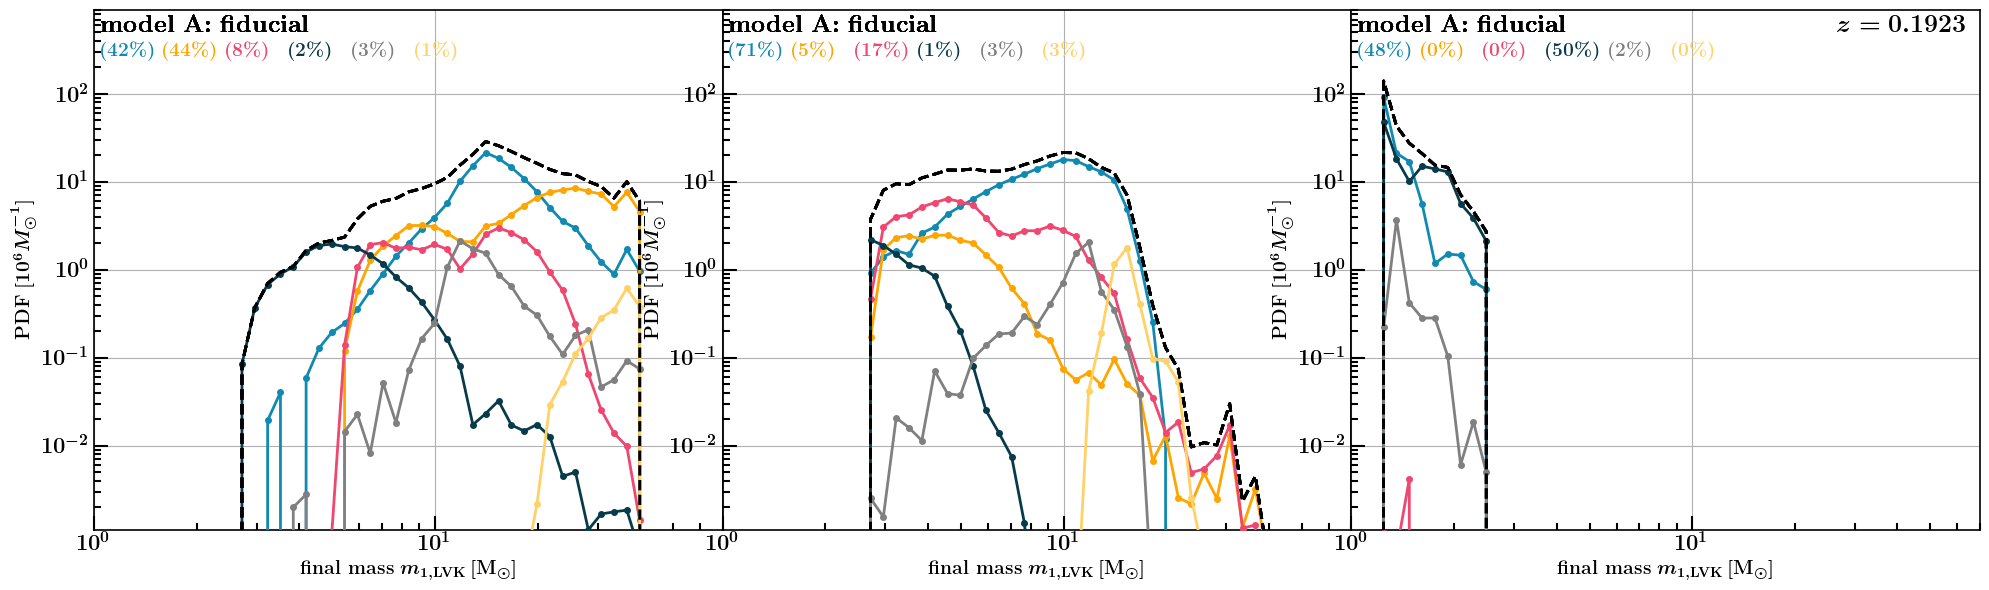

running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232


/Users/floorbroekgaarden/miniforge3/envs/ipykernel_py39/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232
running for z= 0.19230769230769232


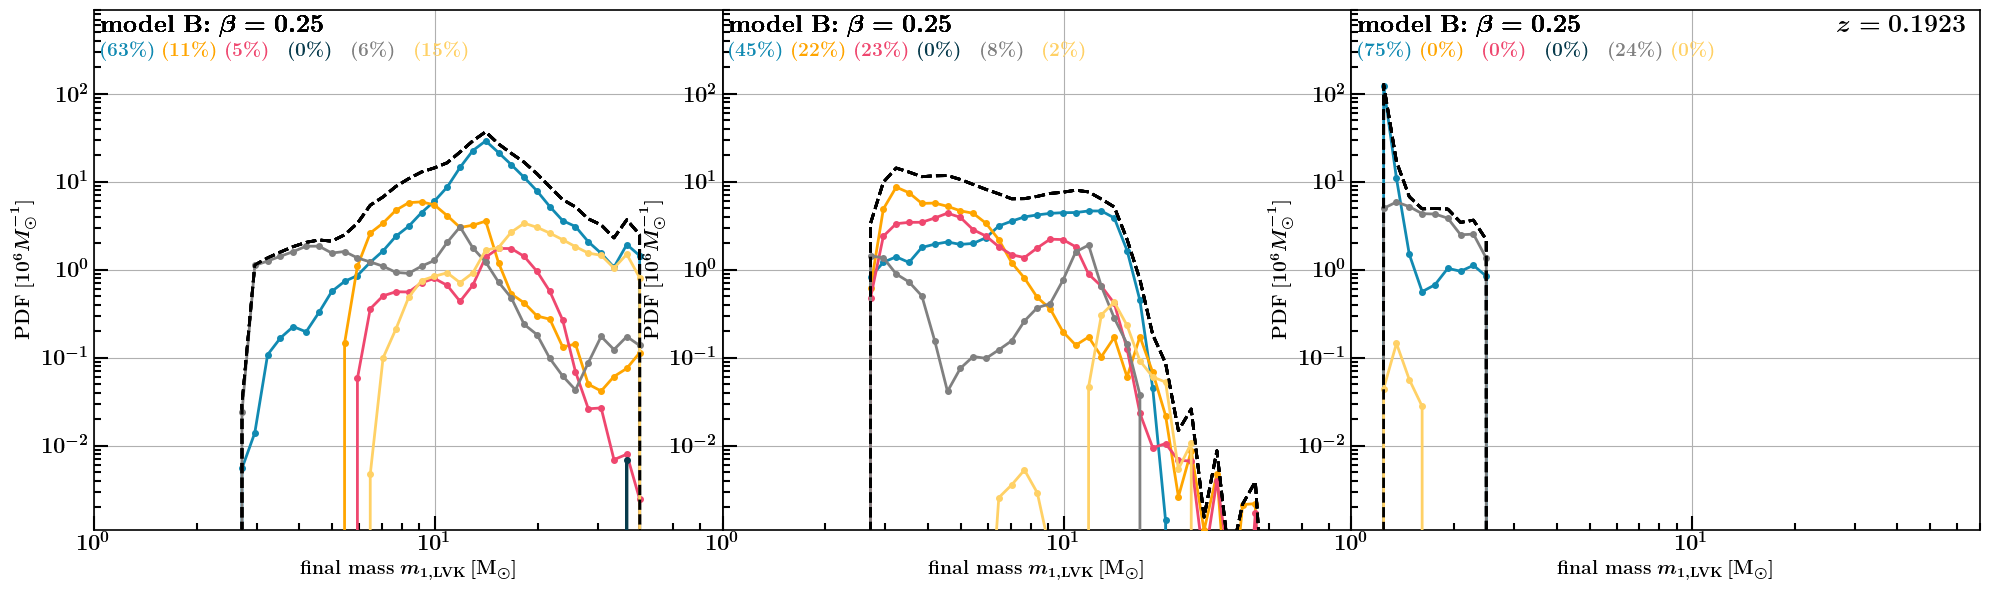

In [71]:

plot_param_name = 'M1LVK_logx'
dir_str =  'figures/' + plot_param_name +'/'
# ! mkdir $dir_str

xparam_key, xparam_function = None, 'M1LVK'
yparam_key, yparam_function = None, 'tdelay'

which_z_ind=0

# # plot 2D distribution with fraction plotted as extra panel. 
# plot_param_fc_for_all_BPS_per_channel_with_fraction(plot_param_name=plot_param_name, xparam_key=xparam_key, xparam_function = xparam_function, yparam_key=yparam_key, yparam_function=yparam_function)
# plot PDF distributions for a formation channel across all BPS models 
# plot_param_fc_for_all_BPS_per_channel_with_PDF(plot_param_name=plot_param_name, xparam_key=xparam_key, xparam_function = xparam_function, yparam_key=yparam_key, yparam_function=yparam_function)
# plot PDF distributions for different formation channels in the same panel 
plot_param_fc_all_justPDF(plot_param_name=plot_param_name, xparam_key=xparam_key, xparam_function = xparam_function, yparam_key=yparam_key, yparam_function=yparam_function, which_z_ind=which_z_ind)




running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308


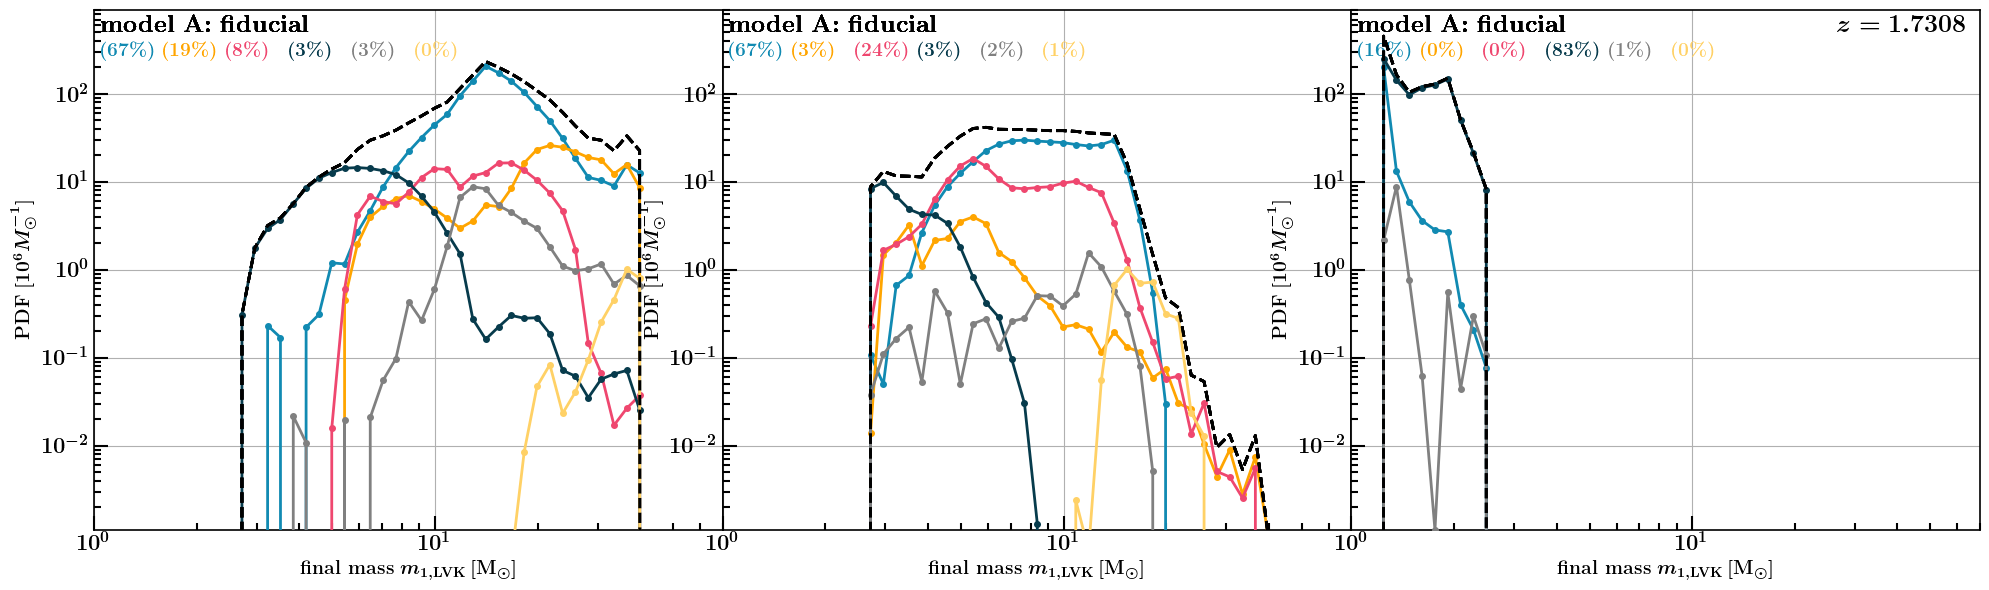

running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308


/Users/floorbroekgaarden/miniforge3/envs/ipykernel_py39/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308
running for z= 1.7307692307692308


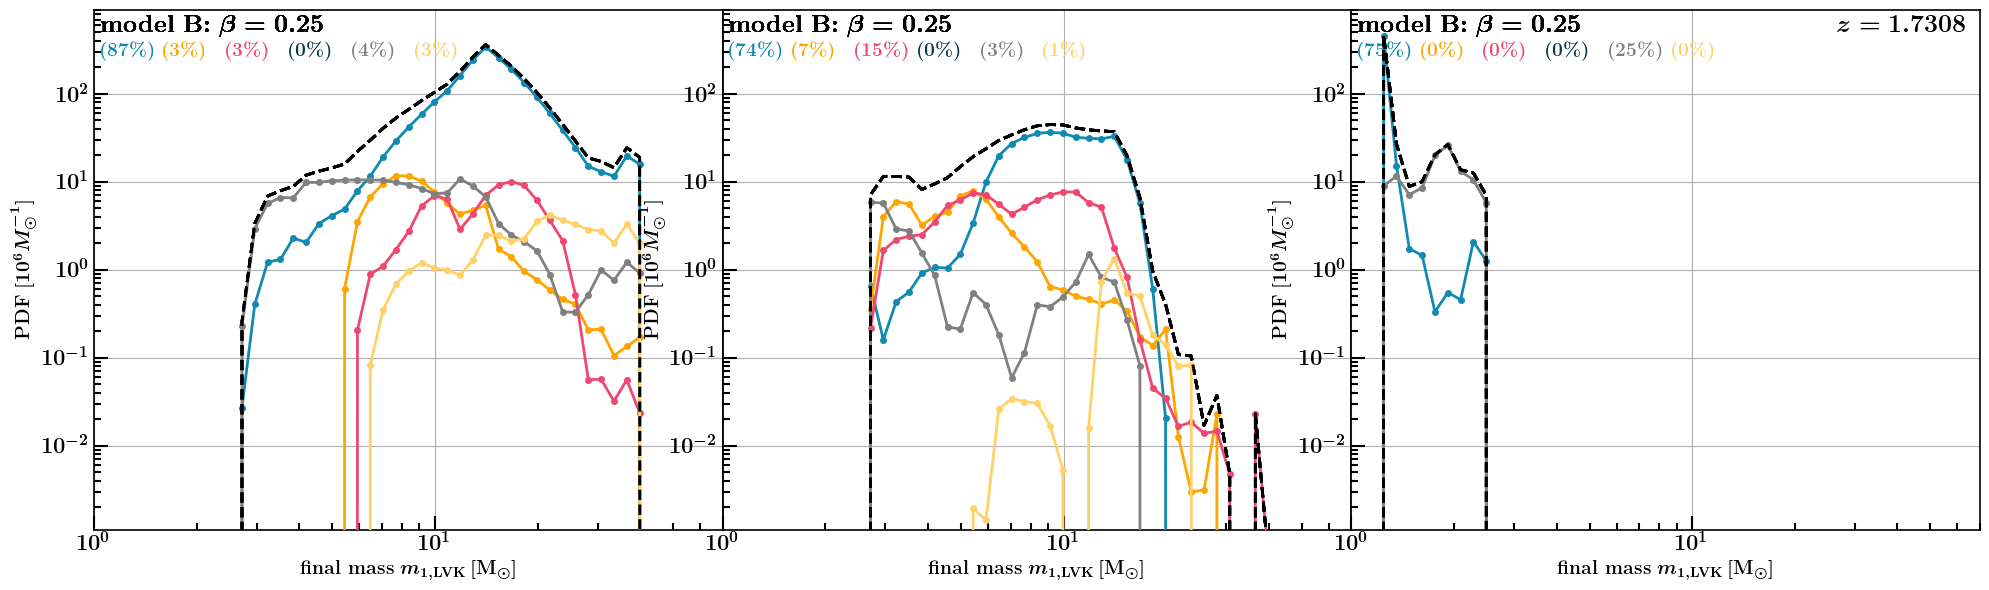

In [74]:

plot_param_name = 'M1LVK_logx'
dir_str =  'figures/' + plot_param_name +'/'
# ! mkdir $dir_str

xparam_key, xparam_function = None, 'M1LVK'
yparam_key, yparam_function = None, 'tdelay'

which_z_ind=4

plot_param_fc_all_justPDF(plot_param_name=plot_param_name, xparam_key=xparam_key, xparam_function = xparam_function, yparam_key=yparam_key, yparam_function=yparam_function, which_z_ind=which_z_ind)




running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538


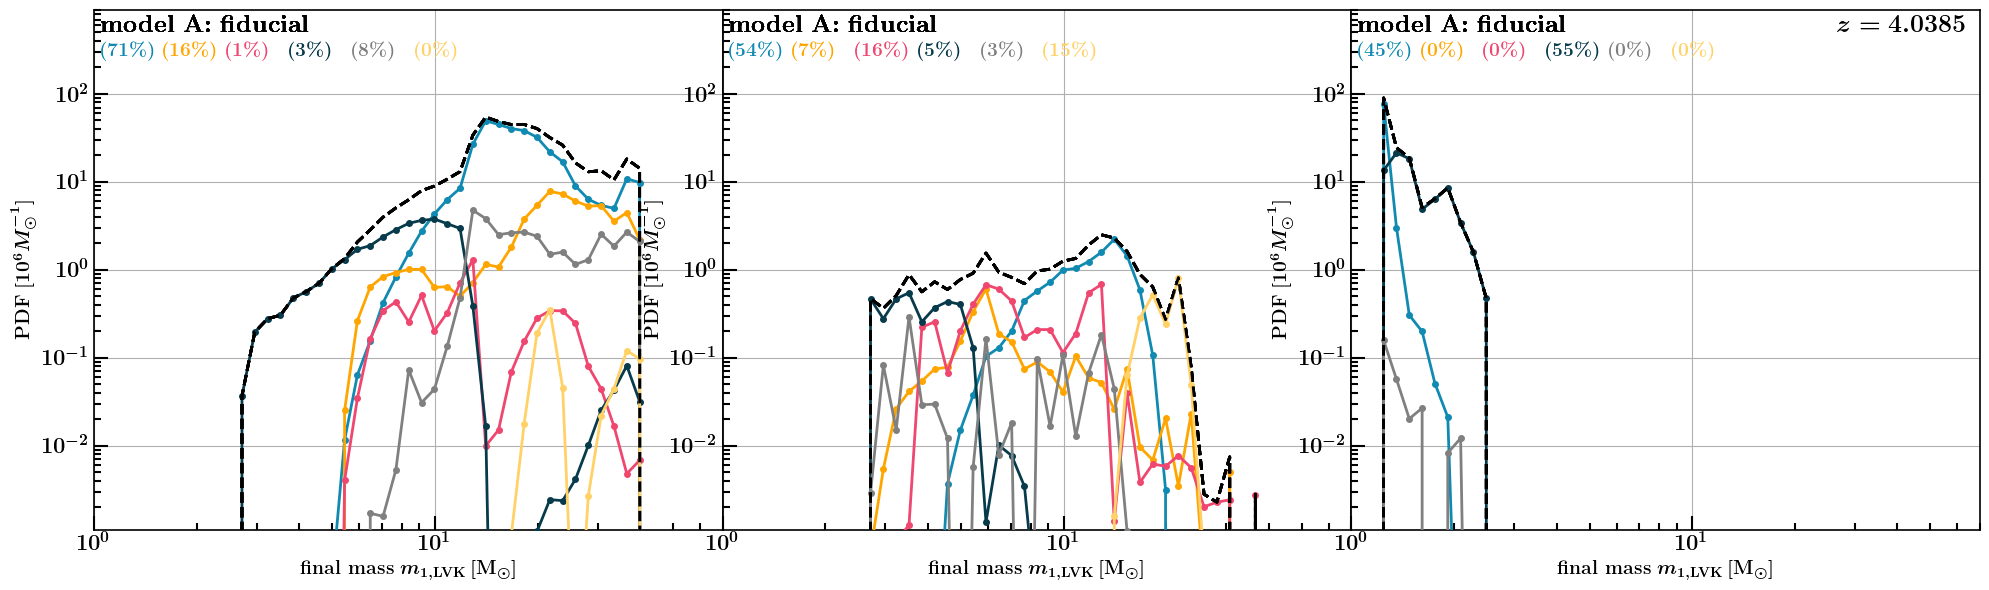

running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538
running for z= 4.038461538461538


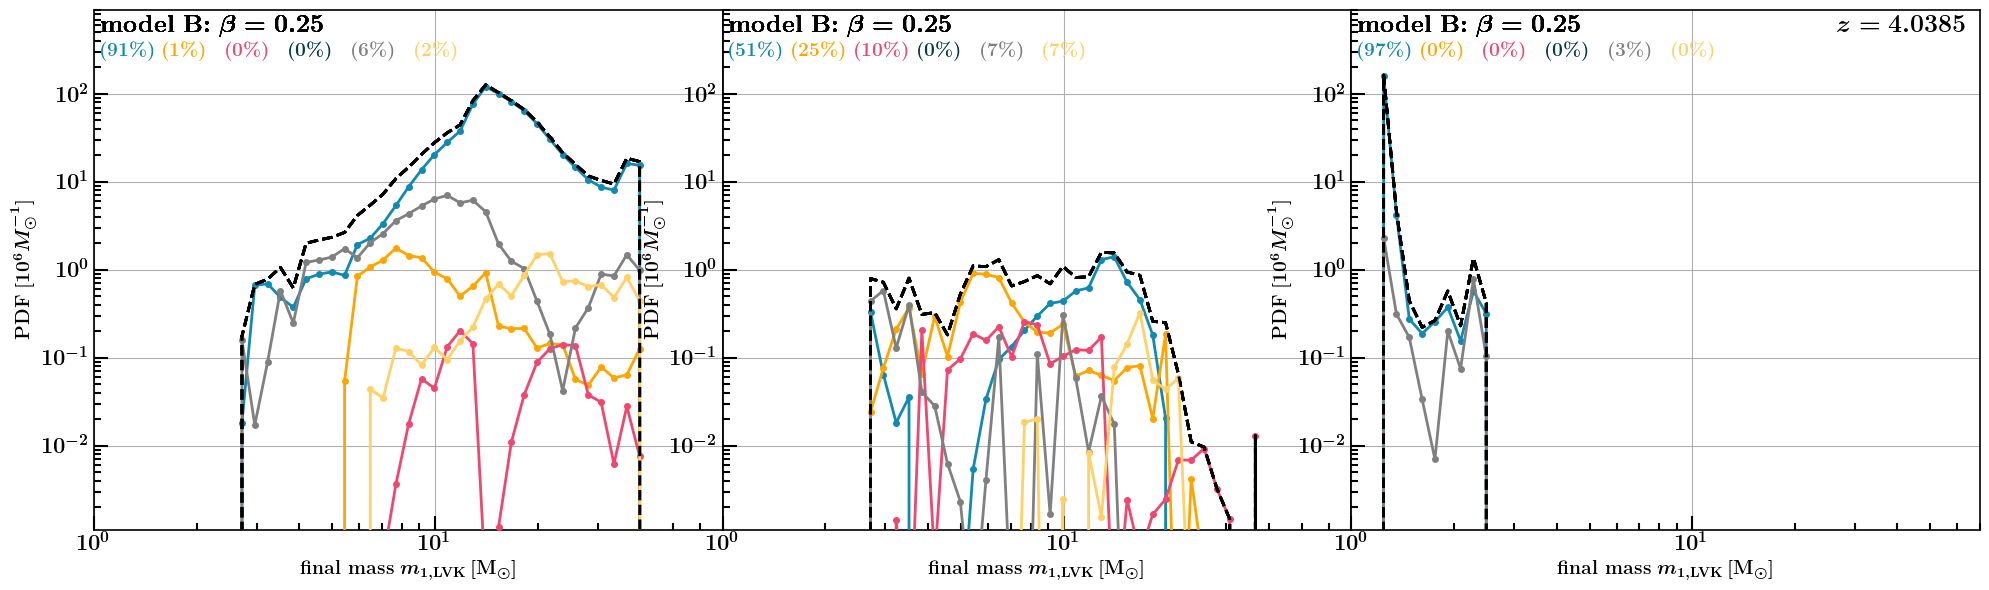

In [75]:

plot_param_name = 'M1LVK_logx'
dir_str =  'figures/' + plot_param_name +'/'
# ! mkdir $dir_str

xparam_key, xparam_function = None, 'M1LVK'
yparam_key, yparam_function = None, 'tdelay'

which_z_ind=10

plot_param_fc_all_justPDF(plot_param_name=plot_param_name, xparam_key=xparam_key, xparam_function = xparam_function, yparam_key=yparam_key, yparam_function=yparam_function, which_z_ind=which_z_ind)



In [34]:
BPSmodelName = 'A'
DCOtype='BHNS'
pathData= '/Volumes/SimonsFoundation/DataDCO/'
path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path to data 
fdata = h5.File(path, 'r') # read in data 

fwz = fdata['weights_intrinsicPerRedshift']

print(fwz.keys())
fdata.close()

<KeysViewHDF5 ['SEED', 'w_000_z_0.1923', 'w_000_z_0.5769', 'w_000_z_0.9615', 'w_000_z_1.3462', 'w_000_z_1.7308', 'w_000_z_2.1154', 'w_000_z_2.5', 'w_000_z_2.8846', 'w_000_z_3.2692', 'w_000_z_3.6538', 'w_000_z_4.0385', 'w_000_z_4.4231', 'w_000_z_4.8077', 'w_000_z_5.1923', 'w_000_z_5.5769', 'w_000_z_5.9615', 'w_000_z_6.3462', 'w_000_z_6.7308', 'w_000_z_7.1154', 'w_000_z_7.5', 'w_000_z_7.8846', 'w_000_z_8.2692', 'w_000_z_8.6538', 'w_000_z_9.0385', 'w_000_z_9.4231', 'w_000_z_9.8077', 'w_111_z_0.1923', 'w_111_z_0.5769', 'w_111_z_0.9615', 'w_111_z_1.3462', 'w_111_z_1.7308', 'w_111_z_2.1154', 'w_111_z_2.5', 'w_111_z_2.8846', 'w_111_z_3.2692', 'w_111_z_3.6538', 'w_111_z_4.0385', 'w_111_z_4.4231', 'w_111_z_4.8077', 'w_111_z_5.1923', 'w_111_z_5.5769', 'w_111_z_5.9615', 'w_111_z_6.3462', 'w_111_z_6.7308', 'w_111_z_7.1154', 'w_111_z_7.5', 'w_111_z_7.8846', 'w_111_z_8.2692', 'w_111_z_8.6538', 'w_111_z_9.0385', 'w_111_z_9.4231', 'w_111_z_9.8077', 'w_112_z_0.1923', 'w_112_z_0.5769', 'w_112_z_0.9615',

ValueError: Invalid group (or file) id (invalid group (or file) ID)